<a href="https://colab.research.google.com/github/qusai238/PAMAP-Dataset-analysis-and-classification-/blob/main/PAMAP_DSRM_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

The PAMAP two is an open source data set Created by the ceenter for Machine Learning and intelligent Systems UCI, basically it is a dataset which has physical activity monitoring data of 18 physical activities which was perormed by 9 subjects wearing 3 internal measurement devices and a heart rate monitor. 8 subjects were male and one was female. and with respect to IMU they were the following ones.
- sampling frequency: 100Hz
- position of the sensors:
    - 1 IMU over the wrist on the dominant arm
    - 1 IMU on the chest
    - 1 IMU on the dominant side's ankle

This dataset can be used for many scientifical research fields such as activity recongnition and intensity estimation while also applying algorithms for data processing, segmentation and feature extraction, All the data related to the sensors,heart rate devices and the participants can be found on their website if any further infromation is needed. So, here this dataset was used for data analysis and classification of Activities and then training different machine learning models which can classify the activities.So, the project is going to be divided into sections, first one would be exploring and cleaning the data to get some useful insights and plots, moving on, will by doing a hypothesis test between different features to verify some hypothesis about the data, and finally, a couple of machine learning algorithms will be fed with cleaned data and evaluated using this dataset.

#Importing Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
# ignoring future warnings
import warnings
warnings.simplefilter('ignore')

In [ ]:
# Changing default pandas setting to custom
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = (14, 7)
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 20)
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading the Data

In this section the data was downloaded from the official website and uploaded to this notebook, it should be taken into consideration that the size of the data is fairly large about 1.3 gigabytes, also this is a dataset which is produced from a real life scenario, therefore some data is missing. Missing data had 2 main reason:
- Data dropping due to using wireless sensors. This however only occurred very rarely: the 3 IMUs had a “real” sampling frequency of 99.63Hz, 99.89Hz and 99.65Hz for hand, chest and ankle IMU placement, respectively.
- Problems with the hardware setup, causing e.g. connection loss to the dongles or system crash.Due to these problems, some activities for certain subjects are partly or completely missing.

Altogether, over 10 hours of data were collected, from which nearly 8 hours were labeled as 1 of the 18
activities performed during data collection.

Dataset was in 9 files according to each subject and format of file was .dat that can be read with pandas library. But in the data files there were no header present. So, after taking a look at the data description file, all column names were copied then written exactly and stored in a python list that can be seen in the lower cell. After that, each file was read one by one, put the header and appended into a single dataframe. And for doing all of this a function was codded that takes the address of a folder that has data files and read the data. And this function returns the dataframe to the main function that was stored in df variable and printed the head and tail of dataset that can be seen below.

In [ ]:
# Column names of the data
columns = ['time_stamp', 'activity_id', 'heart_rate', 'hand_temperature', 'hand_3D_acceleration_16_x',  'hand_3D_acceleration_16_y',
         'hand_3D_acceleration_16_z', 'hand_3D_acceleration_6_x', 'hand_3D_acceleration_6_y', 'hand_3D_acceleration_6_z', 'hand_3D_gyroscope_x',
         'hand_3D_gyroscope_y',  'hand_3D_gyroscope_z', 'hand_3D_magnetometer_x', 'hand_3D_magnetometer_y', 'hand_3D_magnetometer_z',
         'hand_4D_orientation_x', 'hand_4D_orientation_y', 'hand_4D_orientation_z', 'hand_4D_orientation_w', 'chest_temperature', 'chest_3D_acceleration_16_x',
         'chest_3D_acceleration_16_y', 'chest_3D_acceleration_16_z', 'chest_3D_acceleration_6_x', 'chest_3D_acceleration_6_y',  'chest_3D_acceleration_6_z',
         'chest_3D_gyroscope_x', 'chest_3D_gyroscope_y', 'chest_3D_gyroscope_z', 'chest_3D_magnetometer_x', 'chest_3D_magnetometer_y',
         'chest_3D_magnetometer_z', 'chest_4D_orientation_x', 'chest_4D_orientation_y', 'chest_4D_orientation_z', 'chest_4D_orientation_w',
         'ankle_temperature', 'ankle_3D_acceleration_16_x', 'ankle_3D_acceleration_16_y', 'ankle_3D_acceleration_16_z', 'ankle_3D_acceleration_6_x',
         'ankle_3D_acceleration_6_y', 'ankle_3D_acceleration_6_z', 'ankle_3D_gyroscope_x', 'ankle_3D_gyroscope_y', 'ankle_3D_gyroscope_z',
         'ankle_3D_magnetometer_x', 'ankle_3D_magnetometer_y', 'ankle_3D_magnetometer_z', 'ankle_4D_orientation_x', 'ankle_4D_orientation_y',
         'ankle_4D_orientation_z', 'ankle_4D_orientation_w']

In [ ]:
# Function to load all subjects data
def load_data(root):
    data = pd.DataFrame()
    
    for i in range(101,110):
        path = root + str(i) +'.dat'
        df = pd.read_table(path, header=None, sep='\s+')
        df.columns = columns 
        df['id'] = i
        data = data.append(df, ignore_index=True)
    data.reset_index(drop=True, inplace=True)
    return data

df = load_data('/content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject')

In [ ]:
df.head()

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,hand_3D_gyroscope_x,hand_3D_gyroscope_y,hand_3D_gyroscope_z,hand_3D_magnetometer_x,hand_3D_magnetometer_y,...,ankle_3D_acceleration_16_z,ankle_3D_acceleration_6_x,ankle_3D_acceleration_6_y,ankle_3D_acceleration_6_z,ankle_3D_gyroscope_x,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,14.6806,-69.2128,...,-0.099797,9.64689,-1.55576,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,101
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,0.047758,0.006474,14.8991,-69.2224,...,-0.215687,9.61670,-1.61630,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,101
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,0.032574,-0.006988,14.2420,-69.5197,...,0.092914,9.63173,-1.58605,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,101
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,0.032810,-0.003747,14.8908,-69.5439,...,0.054545,9.63197,-1.63135,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,101
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,0.018305,-0.053325,15.5612,-68.8196,...,-0.060809,9.64699,-1.64647,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,101


In [ ]:
df.tail()

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,hand_3D_gyroscope_x,hand_3D_gyroscope_y,hand_3D_gyroscope_z,hand_3D_magnetometer_x,hand_3D_magnetometer_y,...,ankle_3D_acceleration_16_z,ankle_3D_acceleration_6_x,ankle_3D_acceleration_6_y,ankle_3D_acceleration_6_z,ankle_3D_gyroscope_x,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,1.78406,0.087985,0.934673,21.1701,-35.3878,...,-3.27370,9.09401,-0.228554,-2.68770,-0.037788,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,109
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,1.47521,-0.028917,0.806540,20.7931,-34.9954,...,-3.30873,9.27291,-0.607010,-2.99014,-0.068904,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,109
2872530,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,1.29099,-0.155493,0.762446,20.6763,-36.6013,...,-3.23340,9.43813,-0.697724,-2.99072,-0.070888,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416,109
2872531,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,1.20794,-0.311214,0.748814,20.5408,-35.8494,...,-3.31161,9.49875,-0.576563,-2.87035,0.018961,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029207,109
2872532,100.23,0,161.0,25.1875,-4.09726,8.15642,3.29961,-4.73244,8.82870,3.54305,1.40417,-0.396125,0.728581,20.3057,-37.3255,...,-3.38935,9.51292,-0.470945,-3.08266,-0.027472,0.011866,-0.042858,-46.2704,4.21475,0.247798,0.598119,0.033685,0.800188,-0.028602,109


#Data Cleaning

after checking the head and tail of dataset it was noticed that there are null values present in different features and that issue needs to be taken care of, so,these null values will be manipulated and this comes under the hood of data preprocessing and cleaning. Data Preprocessing refers to the cleaning of data from null values, outliers and ambiguities. Data preprocessing is crucial in any data mining process as they directly impact success rate of the project. This reduces complexity of the data under analysis as data in real world is unclean.Moreover it can increase the accuracy and learning rate of the machine learning model by feeding it cleaned data.

So,a function that takes the dataframe as parameter was coded, this function checks the percentage of missing values, unique values, percentage of one catagory values and type against each column. And put all details in a dataframe and return it to the main function that can be seen below.

When this function was applied on the data,the result was that there were 52 columns that had null values. One feature heart rate was missing around 90 percent data but others feature were having null values less than 5 percent. So, this issue needs to be taken care of, these null values should be either filled or dropped out. All the variables that were having Null values were float. So, after checking the Distribution of feature/variable, if it is not in normal distribution then the **median** value of that feature was used to replace it with the null values and if it is in normal distribution then the **mean** value was used.All of this functionality was put into a function and the resutl was in the form of a cleaned data from null values.

also, the records where activity_id was 0 were dropped,because this is an invalid acivity and was present in the data due to a fault made by the sensors.This table that shows the null values present in the dataset will be helpful to deal with null values which can be seen next.
 

In [ ]:
# A function that checks the percentage of missing values,unique values,percentage of one catagory values and type against each column.
def statistics(df):
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum(), df[col].isnull().sum() * 100 / df.shape[0], df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Missing values', 'Percentage of Missing Values', 'Data Type'])
    stats_df.set_index('Feature', drop=True, inplace=True)
    stats_df.drop(stats_df[stats_df['Missing values'] == 0].index, axis=0, inplace=True)
    stats_df.sort_values('Percentage of Missing Values', ascending=False, inplace=True)
    return stats_df

statistics(df).T

Feature,heart_rate,hand_3D_gyroscope_z,hand_temperature,hand_4D_orientation_z,hand_4D_orientation_y,hand_4D_orientation_x,hand_3D_magnetometer_z,hand_3D_magnetometer_y,hand_3D_magnetometer_x,hand_4D_orientation_w,hand_3D_gyroscope_y,hand_3D_acceleration_6_z,hand_3D_acceleration_6_y,hand_3D_acceleration_6_x,hand_3D_acceleration_16_z,...,chest_temperature,chest_3D_acceleration_16_x,chest_3D_acceleration_16_y,chest_3D_acceleration_16_z,chest_3D_acceleration_6_x,chest_3D_acceleration_6_y,chest_3D_gyroscope_x,chest_4D_orientation_z,chest_3D_gyroscope_z,chest_3D_magnetometer_x,chest_3D_magnetometer_y,chest_3D_magnetometer_z,chest_4D_orientation_x,chest_4D_orientation_y,chest_3D_gyroscope_y
Unique_values,146,1875844,138,1247500,1347718,1002405,1130762,1220419,1156337,1400053,1887532,1314568,1349065,1306360,1282774,...,123,1209537,752809,1230712,1515867,763044,1827061,1449428,1802080,1410128,626338,1270492,849688,951475,1918959
Missing values,2610265,13141,13141,13141,13141,13141,13141,13141,13141,13141,13141,13141,13141,13141,13141,...,3563,3563,3563,3563,3563,3563,3563,3563,3563,3563,3563,3563,3563,3563,3563
Percentage of Missing Values,90.8698,0.457471,0.457471,0.457471,0.457471,0.457471,0.457471,0.457471,0.457471,0.457471,0.457471,0.457471,0.457471,0.457471,0.457471,...,0.124037,0.124037,0.124037,0.124037,0.124037,0.124037,0.124037,0.124037,0.124037,0.124037,0.124037,0.124037,0.124037,0.124037,0.124037
Data Type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [ ]:
#Function that fills the null values with either the mean or median based on a normal test
def fillnull(columns, df=df):
    from scipy.stats import normaltest
    # Iterating Numerical columns
    for i in columns:
        # Finding Normality of feature
        st, p = normaltest(df[i].dropna())

        # Checking if normal or not
        if p > 0.05:
            # Filling with mean if normal
            df[i].fillna(df[i].mean(), inplace=True)
        else:
            # Filling with median if not normal
            df[i].fillna(df[i].median(), inplace=True)
            
# Taking out column names that have null values
num_cols = statistics(df).index

# Applying function
fillnull(num_cols)

In [ ]:
# Acitvity_id = 0 is not an valid activity so it should be dropped
df.drop(df[df['activity_id']==0].index, inplace=True, axis=0)

In [ ]:
#As it can be seen here there is no null values any longer in the dataframe.
df.isnull().sum()

time_stamp                   0
activity_id                  0
heart_rate                   0
hand_temperature             0
hand_3D_acceleration_16_x    0
                            ..
ankle_4D_orientation_x       0
ankle_4D_orientation_y       0
ankle_4D_orientation_z       0
ankle_4D_orientation_w       0
id                           0
Length: 55, dtype: int64

#Data Analysis and Visualisation

Of course after cleaning the data set, comes one of the most important sterps in any data science project, which is the data analysis step, in this step alot of relationships betweeen features will be invistigated, and to get more useful insights about the relationships between different features different kinds of plots will be made and all of that will be explained in this section.Now, after carrying out a full data analysis, the following points were deduced. In the dataset 1942872 rows and 55 columns are present. Total number of cells in the dataset are 106857960. There are 53 Numeric Columns and 2 categorical columns. And for checking all of this pandas built in functions were used that can be seen below. 

After that,a check of the statistical properties was made and provided percentile 10, 35, 65 and 90 and for these percentiles the distribution of data can be seen in the form of table.

Moving on, a copy of the original dataframe was produced, and tha was made so that no changes are made to the original dataframe, the copy dataframe was stored in variable named temp.

Also with that, all of the activities were taken and put into a dictionary with the key as the activity_id. So, the key of dictionary item is the activity_id and the value is the activity_name and mapped this dictionary to the activity_id faeture of dataframe and the result was a series of acitivity names that was stored in temp dataframe.

In [ ]:
# Printing the shape of data
df.shape

(1942872, 55)

In [ ]:
# Number of total columns in data
len(df.columns)

55

In [ ]:
# Total cells in whole dataset
df.size

106857960

In [ ]:
# Checking statistical properties of data
df.describe(percentiles=[0.10, 0.35, 0.75, 0.90])

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,hand_3D_gyroscope_x,hand_3D_gyroscope_y,hand_3D_gyroscope_z,hand_3D_magnetometer_x,hand_3D_magnetometer_y,...,ankle_3D_acceleration_16_z,ankle_3D_acceleration_6_x,ankle_3D_acceleration_6_y,ankle_3D_acceleration_6_z,ankle_3D_gyroscope_x,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
count,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,...,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06
mean,1.705202e+03,8.081830e+00,1.079515e+02,3.275963e+01,-4.943177e+00,3.580253e+00,3.605620e+00,-4.876025e+00,3.569342e+00,3.790248e+00,6.080373e-04,3.970733e-02,-2.237332e-03,2.107173e+01,-1.399177e+01,...,-2.591120e+00,9.375553e+00,-4.835722e-02,-2.172922e+00,1.059360e-02,-3.662472e-02,7.682278e-03,-3.157879e+01,1.414484e+00,1.724661e+01,3.808485e-01,-9.085946e-03,3.022251e-01,-5.700755e-02,1.045664e+02
std,1.093463e+03,6.174789e+00,8.153488e+00,1.787061e+00,6.213609e+00,6.868160e+00,3.949128e+00,6.219566e+00,6.567392e+00,3.935333e+00,1.324663e+00,9.514833e-01,1.590970e+00,2.374529e+01,2.416919e+01,...,3.929740e+00,6.056773e+00,7.178089e+00,3.470025e+00,1.124517e+00,6.366842e-01,2.007497e+00,1.831667e+01,2.164097e+01,1.967857e+01,3.030679e-01,5.701243e-01,3.321016e-01,4.791387e-01,2.333052e+00
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.121470e+01,-6.184170e+01,-6.193470e+01,-2.813540e+01,-1.784950e+01,-1.426470e+01,-1.039410e+02,-2.000430e+02,...,-1.589260e+02,-6.114200e+01,-6.190640e+01,-6.231480e+01,-2.399500e+01,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.027160e+02,1.521280e-06,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.010000e+02
10%,3.333700e+02,2.000000e+00,1.080000e+02,3.025000e+01,-1.152690e+01,-2.512935e+00,-6.130885e-01,-1.153390e+01,-2.507556e+00,-4.517006e-01,-1.192100e+00,-8.227418e-01,-1.620309e+00,-8.869790e+00,-4.231700e+01,...,-6.014958e+00,6.494480e-01,-8.121898e+00,-5.591197e+00,-1.022100e+00,-5.978889e-01,-2.160818e+00,-5.117290e+01,-2.720199e+01,-7.323950e+00,5.458112e-02,-7.399519e-01,-2.624269e-02,-6.540579e-01,1.010000e+02
35%,1.006520e+03,4.000000e+00,1.080000e+02,3.256250e+01,-7.911720e+00,2.327797e+00,2.178770e+00,-7.796420e+00,2.367789e+00,2.378730e+00,-1.063890e-01,-4.721753e-02,-7.249963e-02,1.068420e+01,-2.309071e+01,...,-3.193910e+00,9.181190e+00,-1.188859e+00,-2.776152e+00,-3.878971e-02,-3.303092e-02,-5.558186e-02,-3.857850e+01,-5.996760e+00,1.145340e+01,1.850220e-01,-4.292882e-01,1.399645e-01,-3.859650e-01,1.030000e+02
50%,1.480330e+03,6.000000e+00,1.080000e+02,3.312500e+01,-5.471425e+00,3.552220e+00,3.409340e+00,-5.403245e+00,3.589195e+00,3.642290e+00,-6.160635e-03,6.132895e-03,-5.327310e-03,2.302140e+01,-1.627000e+01,...,-2.408250e+00,9.557240e+00,-2.110680e-01,-1.978540e+00,4.251595e-03,-4.249850e-03,-2.216015e-03,-3.390020e+01,9.251920e-01,1.861900e+01,2.847090e-01,0.000000e+00,3.043820e-01,0.000000e+00,1.050000e+02
75%,2.663610e+03,1.300000e+01,1.080000e+02,3.406250e+01,-9.786613e-01,6.431750e+00,6.530193e+00,-9.260655e-01,6.442353e+00,6.775690e+00,3.273235e-01,2.619685e-01,3.587245e-01,3.920760e+01,2.046437e+00,...,-1.054400e+00,1.026433e+01,1.907170e+00,-6.027365e-01,1.283190e-01,1.137143e-01,8.955562e-02,-1.792845e+01,1.778380e+01,3.115002e+01,5.589960e-01,6.130020e-01,5.949153e-01,4.360202e-01,1.070000e+02
90%,3.253510e+03,1.700000e+01,1.080000e+02,3.475000e+01,3.378374e+00,8.87

In [ ]:
# Creating a copy of data
temp = df.copy()

In [ ]:
# Mapping Acitivity name to its ID
activity_map = {1: 'lying', 2:'sitting', 3:'standing', 4:'walking', 5:'running', 6:'cycling', 7:'Nordic_walking',
          9:'watching_TV', 10:'computer_work', 11:'car driving', 12:'ascending_stairs', 13:'descending_stairs',
          16:'vacuum_cleaning', 17:'ironing', 18:'folding_laundry', 19:'house_cleaning', 20:'playing_soccer', 24:'rope_jumping'}

temp["activity"] = [activity_map[x] for x in temp['activity_id']]

### ii) Distribution

In this part of data analysis , the goal is to check the distribution of all data among different values in different features, like for Subjects. knowing the distribution of the data is an important thing, as it might help in the next upcoming parts which are hypothesis testing and machine learning. And to do this analysis, the following functions were made which produce plots of different kinds. the explanation of each function is as it follows: 

- make_bar_plot
        
        This function will draw a bar chart and for making this chart this function will take x and y values from the user as parameter. X values will of categorical type that will be plotted on the x-axis and y values will be of numerical to be drawn at the y-axis. In the function first of all the plot size was set and then the x, y values were plotted on a bar chart and after that the labels and title were set.
        
- per_on_bar
        
        This function takes a pandas series and title for plot as parameter and first of all check the distribution of values among different categories present in that faeture and then print some necassary details like Total unique values, values and their frequency and then it makes a barplot of that feature. And in the end the code to put the percentage on the bars of plot according to the frequency of that bar was written.
        
- make_plots

        This one is the advance version of previous plot with just an addition of Pie blot. In previous plot we were just plotting only one plot that was bar but in this plot all previous plot were also made in addition to one extra plot named PIE plot.
        

 these functions were applied on different features of data to get interesting insights from the data that can be seen at the end of analysis from each plot. visualizing the relationships between the features can help in understanding the relationships better. 

In [ ]:
#function that produced a bar plot
def make_bar_plot(x, y, title, xlable=None, ylable=None):
    plt.figure(figsize=(15, 5))
    sns.barplot(x, y)
    plt.title(title, fontsize=18)
    plt.xlabel(xlable, fontsize=14)
    plt.ylabel(ylable, fontsize=14)
    plt.xticks(rotation=65)
    plt.show()

In [ ]:
# Percentage on bar
def per_on_bar(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.title(title, fontsize=18)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="black", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    plt.show()

In [ ]:
def make_plots(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.title(title)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    
    plt.subplot(1,2,2)
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title)
    plt.show()

Total unique values are:  12 


Category	Value

walking              238761
ironing              238690
lying                192523
standing             189931
Nordic_walking       188107
sitting              185188
vacuum_cleaning      175353
cycling              164600
ascending_stairs     117216
descending_stairs    104944
running               98199
rope_jumping          49360
Name: activity, dtype: int64


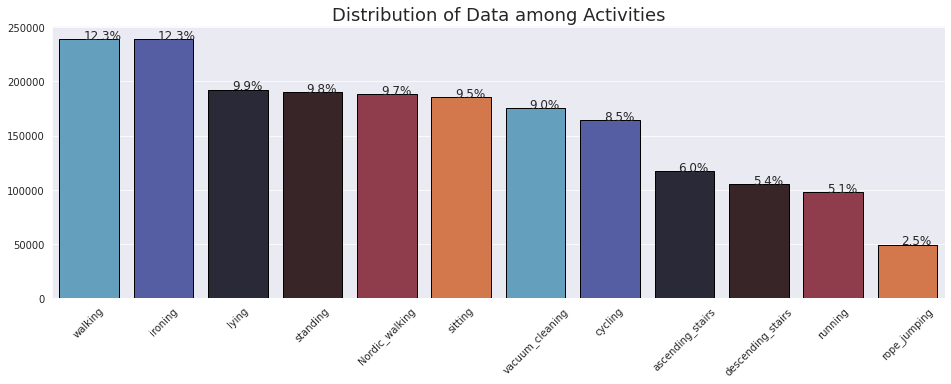

In [ ]:
#Distribution of Data among Activities
per_on_bar(temp.activity, "Distribution of Data among Activities")

Total unique values are:  9 


Category	Value

105    272442
102    263349
108    262102
106    250096
101    249957
107    232776
104    231421
103    174338
109      6391
Name: id, dtype: int64


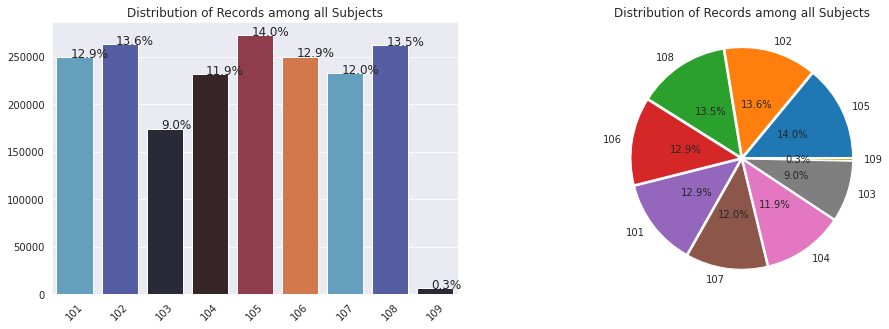

In [ ]:
#Distribution of Records among all subjects
make_plots(temp.id, "Distribution of Records among all Subjects")

From the previous plots it can be seen that the data has some king of imbalance for the following reasons:
* It seems that subject 109 is lacking a lot of data recorded compared to all other 8 subjects.
* Another thing to point out is that rope_jumping activity seems to lack  more recorded data compared to all other physical activities.

These two reasons created some kind of imbalance in the dataset.

### iii) Subject's Average Values Analysis

In [ ]:
# Calculating average by Subjects
temp_mean = temp.groupby(by="id").mean()
temp_mean

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,hand_3D_gyroscope_x,hand_3D_gyroscope_y,hand_3D_gyroscope_z,hand_3D_magnetometer_x,hand_3D_magnetometer_y,...,ankle_3D_acceleration_16_y,ankle_3D_acceleration_16_z,ankle_3D_acceleration_6_x,ankle_3D_acceleration_6_y,ankle_3D_acceleration_6_z,ankle_3D_gyroscope_x,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
101,1713.023960,8.321399,109.296475,32.428002,-4.143173,5.830308,3.739073,-4.103556,5.862828,3.900092,0.055921,0.068685,0.006684,18.417797,-26.881874,...,0.642904,-2.630017,9.047401,0.769149,-2.214459,0.004357,0.008341,0.016343,-49.423034,-3.754792,13.540297,0.997012,0.000000,0.001337,0.000000
102,2067.198238,8.452814,108.136887,32.360710,-5.145123,4.800398,3.031208,-5.093421,4.824961,3.182973,0.045628,0.047133,0.004949,18.670150,-17.798095,...,-0.906205,-1.610221,9.650164,-0.824182,-1.167630,-0.030755,-0.059904,0.001541,-28.828894,1.274388,17.130741,0.278875,-0.009893,0.348836,-0.086346
103,1230.093365,7.923270,106.820366,31.894618,-4.503478,4.377428,3.646426,-4.474977,4.393817,3.769944,0.003781,-0.025682,-0.047451,16.669202,-14.458867,...,-1.139615,-1.438958,9.162626,-1.045847,-1.033933,-0.006878,-0.035372,0.027433,-24.812551,3.959468,17.867496,0.234947,-0.041664,0.283815,-0.143480
104,1559.265968,7.502979,108.131211,31.923744,-5.958050,3.379384,4.256361,-5.906526,3.398208,4.409278,-0.025484,0.013819,-0.003382,29.672222,-13.147294,...,0.778879,-1.644104,9.443280,0.917029,-1.191340,0.020204,-0.051627,0.011815,-27.809879,-2.972361,15.673702,0.290523,-0.139324,0.300326,-0.161739
105,1825.762057,8.081195,108.049280,34.762106,-4.293785,5.534710,3.616004,-4.152253,5.551606,3.863193,0.009135,0.037564,0.026908,18.618130,-19.828632,...,0.112215,-3.314589,9.712199,0.213953,-2.905108,0.007113,-0.040122,0.025115,-31.979373,2.630048,19.965796,0.293231,0.009554,0.417693,-0.017837
106,1718.915039,7.838130,107.544539,32.310389,-5.037313,4.837430,3.556608,-4.979355,4.681043,3.782690,0.018441,0.057279,0.004562,21.899570,-15.738376,...,0.122436,-2.582010,9.479285,0.244105,-2.080539,0.014158,-0.041968,0.012757,-30.427379,1.455238,18.896851,0.276614,0.061292,0.336833,0.013112
107,1539.462669,7.848850,106.940252,32.948386,-5.391964,4.312041,3.874879,-5.307841,4.321127,4.040423,-0.009034,0.014749,0.011485,22.474352,-13.942732,...,-0.409347,-3.677454,9.074184,-0.286038,-3.360418,0.024611,-0.053085,-0.003243,-26.539512,0.193013,18.861642,0.277436,-0.056243,0.386077,-0.125144
108,1827.730716,8.149140,108.169186,33.157541,-5.189092,-4.155156,3.368067,-5.120069,-4.198026,3.597154,-0.101581,0.078064,-0.039460,22.193464,9.962107,...,-0.690438,-3.415522,9.309898,-0.614254,-3.017711,0.048892,-0.020994,-0.024610,-30.195419,9.029662,16.185317,0.352566,0.088798,0.322537,0.027573
109,63.150000,24.000000,111.709748,25.053757,-0.723821,8.900131,-1.210831,-0.828909,8.997202,-1.350681,0.321218,0.061271,0.145766,7.603673,-37.834002,...,1.282055,-3.349550,9.509207,1.438447,-3.091921,0.014607,-0.010275,0.014122,-36.293848,-22.443557,11.202963,0.475303,-0.571940,0.556830,-0.327214


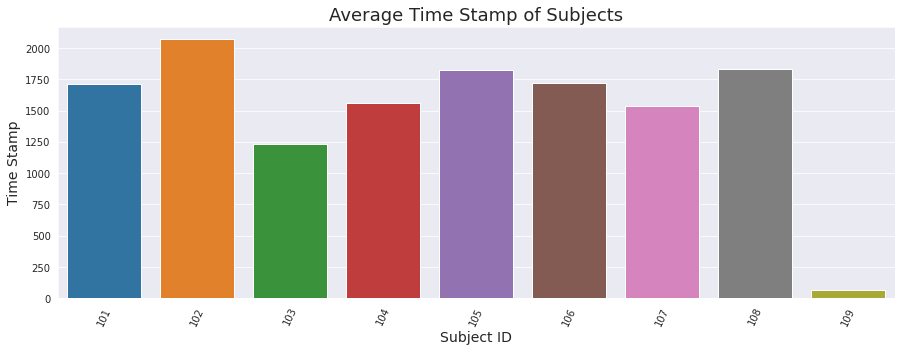

In [ ]:
# Average time stamp
x = temp_mean["time_stamp"]
make_bar_plot(x.index, x.values, "Average Time Stamp of Subjects", "Subject ID", "Time Stamp")

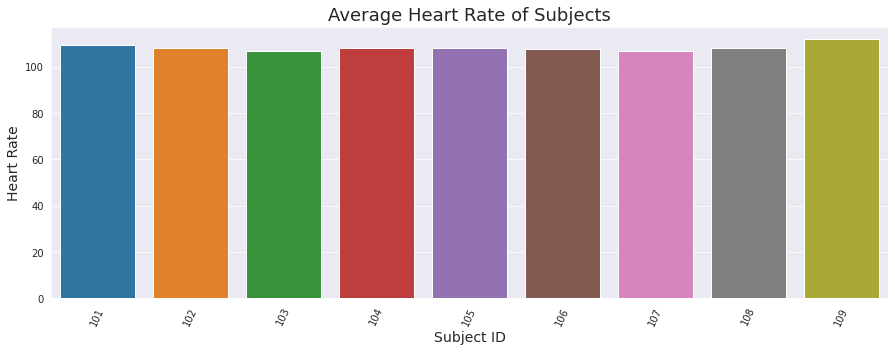

In [ ]:
# Average Heart Rate
x = temp_mean["heart_rate"]
make_bar_plot(x.index, x.values, "Average Heart Rate of Subjects", "Subject ID", "Heart Rate")

#it can be noticed that the average heart rate is almost the same among all subjects.

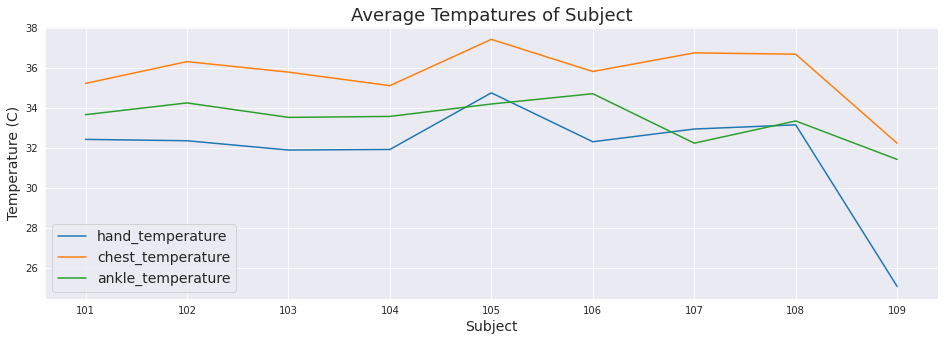

In [ ]:
# Average temperature of each subject
def make_temp_line(data=temp_mean, mode=""):
    x = data[["hand_temperature", "chest_temperature", "ankle_temperature"]]
    plot = x.plot(kind="line", figsize=(16,5))
    plt.title(f"Average Tempatures of {mode}", fontsize = 18)
    plt.xlabel(mode, fontsize = 14)
    plt.ylabel("Temperature (C)", fontsize = 14)
    plt.legend(fontsize = 14)
    plt.show()
    
make_temp_line(mode="Subject")

### iv) Activity's Average Value Analysis

In [ ]:
# Average by Activity
temp_mean_act = temp.groupby("activity").mean()
temp_mean_act

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,hand_3D_gyroscope_x,hand_3D_gyroscope_y,hand_3D_gyroscope_z,hand_3D_magnetometer_x,hand_3D_magnetometer_y,...,ankle_3D_acceleration_16_z,ankle_3D_acceleration_6_x,ankle_3D_acceleration_6_y,ankle_3D_acceleration_6_z,ankle_3D_gyroscope_x,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
activity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Nordic_walking,2903.534275,7.0,109.447166,31.563119,-4.692906,5.062792,2.532172,-4.691875,5.041639,2.682483,-0.001006,0.047465,0.005839,20.621011,-20.290497,...,-3.297881,12.253480,0.864035,-2.900848,-0.003802,-0.140701,0.003786,-37.347342,-0.657277,14.355777,0.437406,-0.004545,0.395776,-0.038963,104.856412
ascending_stairs,1807.092002,12.0,109.966412,33.527005,-8.724285,3.653900,1.591093,-8.635635,3.691228,1.788249,-0.338365,0.170476,0.109325,37.859811,-12.863436,...,-3.100188,9.813094,1.599863,-2.684201,0.373923,0.132463,-0.021313,-35.719273,-4.865132,13.732414,0.479250,-0.078773,0.343167,-0.039851,104.407709
cycling,3129.148477,6.0,109.542783,31.009358,-5.177289,2.513809,7.104957,-5.175979,2.515861,7.246624,-0.043192,-0.013610,0.062234,31.765856,-9.848751,...,-1.521883,9.136902,2.125828,-1.080223,0.085224,0.038612,0.007321,-38.863734,-6.847854,12.934229,0.478149,-0.025842,0.387050,0.030716,104.695917
descending_stairs,1905.858029,13.0,109.933717,33.321992,-6.281281,2.895344,3.630267,-6.182574,2.906397,3.824024,0.275891,-0.103447,-0.188423,32.073471,-13.664110,...,-2.551780,10.778649,1.132302,-2.133773,-0.407857,-0.247890,0.106936,-36.716841,-4.373319,20.272659,0.475664,-0.095292,0.319280,-0.041198,104.174827
ironing,1025.994061,17.0,106.364636,34.021763,-3.385832,3.759544,5.450186,-3.256006,3.755252,5.669341,0.012428,0.018839,-0.006336,3.714468,-25.652631,...,-1.918508,9.601994,-0.399610,-1.458869,0.010656,-0.003310,0.003283,-38.862486,5.561976,34.064288,0.267681,0.370913,0.179006,0.326270,104.722799
lying,205.729715,1.0,105.032188,32.726070,3.672985,2.066945,6.363251,3.784838,2.038741,6.584056,-0.003618,0.004333,-0.000703,-0.333249,9.220654,...,-3.694904,0.545760,-6.234234,-3.314091,0.010511,-0.006015,0.005690,-17.926180,20.563728,0.139339,0.332345,0.104799,0.415710,-0.440753,104.485173
rope_jumping,3349.447230,24.0,112.936629,29.754763,-4.169582,5.360675,-0.525954,-4.294482,5.375774,-0.518283,0.332669,0.449139,0.077897,24.549756,-24.851114,...,-2.435642,9.893180,1.022995,-2.068733,0.007295,-0.009565,0.012278,-40.086582,-7.984541,23.573255,0.470986,-0.022829,0.216365,0.015982,104.205916
running,3445.720541,5.0,112.397916,30.870340,-6.587531,6.722316,0.332299,-6.698203,6.364020,0.432928,0.122016,0.293238,-0.024551,18.712543,-25.627270,...,-3.416390,13.174586,2.938970,-3.136421,0.011962,-0.100590,-0.008328,-36.449433,-8.093681,13.270482,0.496611,-0.030814,0.311371,-0.014713,104.664253
sitting,506.383048,2.0,105.441524,33.262084,-1.381017,4.299342,5.169296,-1.253290,4.298700,5.379180,-0.000236,0.005383,-0.004307,3.578691,-14.384089,...,-2.512212,8.813586,-0.210067,-2.086693,0.006591,-0.005276,0.004705,-22.579285,2.512298,21.122231,0.223562,-0.360577,0.165012,-0.337254,104.310997


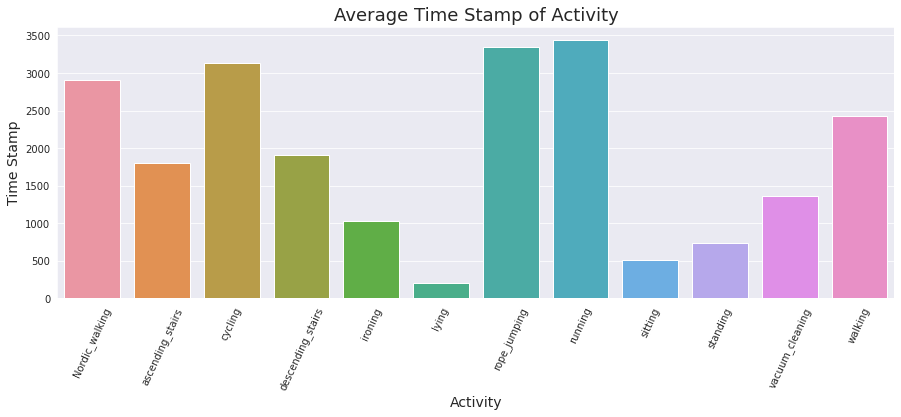

In [ ]:
# Average time stamp of  each activity
x = temp_mean_act["time_stamp"]
make_bar_plot(x.index, x.values, "Average Time Stamp of Activity", "Activity", "Time Stamp")

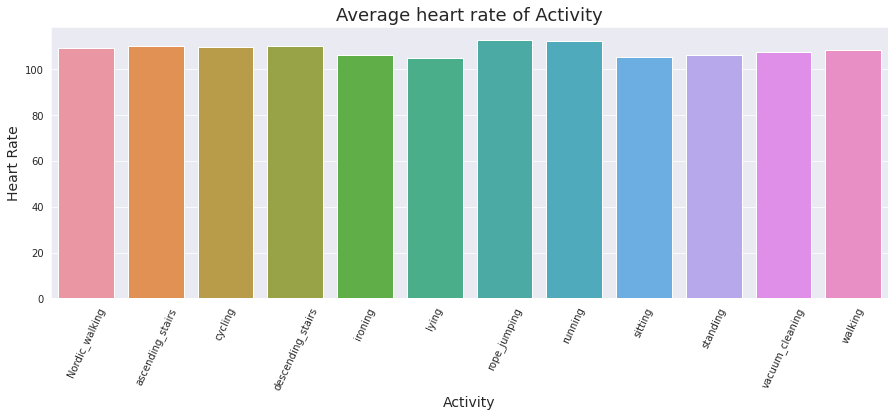

In [ ]:
# Average heart rate for each activity
x = temp_mean_act["heart_rate"]
make_bar_plot(x.index, x.values, "Average heart rate of Activity", "Activity", "Heart Rate")

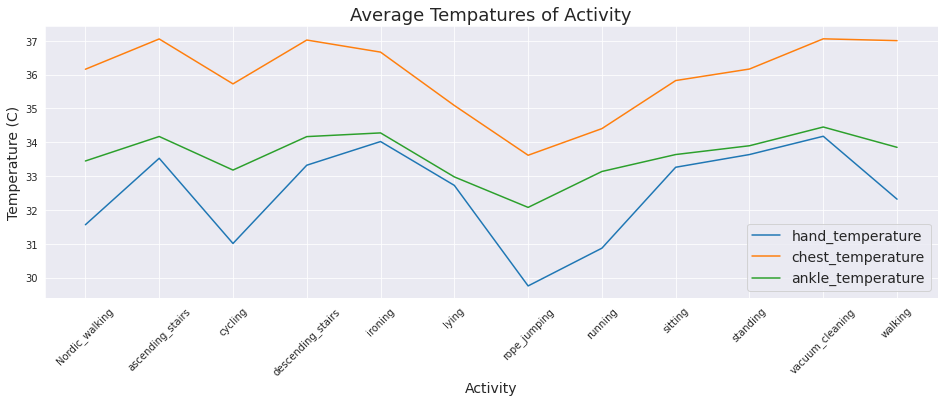

In [ ]:
#Average temperature of when doing each activity 
x = temp_mean_act[["hand_temperature", "chest_temperature", "ankle_temperature"]]

plt.figure(figsize=(16, 5))
sns.lineplot(x=x.index, y=x.hand_temperature, label="hand_temperature")
sns.lineplot(x=x.index, y=x.chest_temperature, label="chest_temperature")
sns.lineplot(x=x.index, y=x.ankle_temperature, label="ankle_temperature")
plt.title(f"Average Tempatures of Activity", fontsize = 18)
plt.ylabel("Temperature (C)", fontsize = 14)
plt.xlabel("Activity", fontsize = 14)
plt.xticks(rotation=45)
plt.legend(fontsize=14)
plt.show()

From all above graphs the following information was deduced:
- There are more number of records for Walking Activity and Less Number of records for Rope Jumpying Activity.
- There are more number of records for 105 Subject and Less Number of records for 109 Subject.
- Time Stamp is highest for Subject 102 and lowest for 109.
- Heart Beat of Subject 109 is highest heart rate, and for others it is almost equal.
- Activity Running has the highest heart rate and activity lying has the smallest heart rate.
- Chest temperature is always higher for all activites of all subjects.
- Hand temperature is always Lower for all activites of all subjects.
- The temperature of all parts of Subject 105 was high.
- All temperatures for activities **ascending & descending stairs and for vaccum cleaning** is high.

and of course alot of valuable information could be extracted from the visiulization and plots made for this dataset, the hypothesis part next will be based on the information extracted from this part.

#Hypothesis Testing

Hypothesis testing is the process which is intended to verify if a claim or a possibility of an event to happen.An assuption is made and based on that assumption different methods of hypothesis testing will be carried out to investigate if that claim or possibility is true based on the P values and the significance value set by the person who carries out these tests. So whith the help of Scipy library, two kinds of hypothesis testing will be carried out, which are t-test, and z-test, and the explantion of this section can be found in the following lines of text.

First of all a function that takes p_value and hypothesis and significance value that is by defualt 0.05 denoting 95 percent interval was written. And then in the function a comparision was carried out between the p_value and the significance value and depending upon the comparision the null hypothesis was either accepted or rejected.

if the p-value is less than or equal sig_values then null hypothesis will be rejected , on the contrary if the p-value is greater than the significane value the p-value then will be of signigicance and the null hypothesis will be accepted , the signigicance value can be 10 or 15%, but in this case a significance value of 0.05 will be used to accept or reject the null hypothesis.

Second function is to perform t-test on the data. The t test tells  how significant the differences between groups are; In other words it allows the reader to know if those differences (measured in means) could have happened by chance. So, t test for two times was preformed to check the following hypothesis.

**Check that the heart beat of two activities among all subjects is equal or not.**
**Check that the Hand temperature of two subjects among all activites is equal or not.**

The results of these two tests can be seen just after the test.

Third function was to perform z test. A z-test is a statistical test to determine whether two population means are different when the variances are known and the sample size is large. A z-test is a hypothesis test in which the z-statistic follows a normal distribution. Z-tests assume the standard deviation is known, while t-tests assume it is unknown.  to check the mean of a subject among two activites a z-test was carried. Following was the statement of the hypothesis test.

**Check that the heart beat of a single subject among two activities is equal or not.** 

The resutls are given below for each test.

In [ ]:
# Function to accept and reject hypothesis
def check_test(pvalue, h0, h1, sig_value=0.05):
    if pvalue <= sig_value:
        print(f"Null Hypothesis Rejected with P_Value={pvalue} So...\n{h1}")
    if pvalue > sig_value:
        print(f"Null Hypothesis Accepted with P_Value={pvalue} So...\n{h0}")

In [ ]:
# Function to perform t test
def t_test(data1, data2, h0, h1, sig_value=0.05):
    import scipy.stats as stats
    stat, p_value = stats.ttest_ind(data1, data2, equal_var=True)
    check_test(p_value, h0, h1, sig_value)

In [ ]:
# Function to perform two sample Z test
def z_test(data1, data2, h0, h1, sig_value=0.05):
    from statsmodels.stats.weightstats import ztest as ztest
    stat, p_value = ztest(data1, data2, value=0)
    check_test(p_value, h0, h1, sig_value)

Check that the heart beat of two activities among all subjects is equal or not.

In [ ]:
# First t test
heart_rate = temp.query("activity == 'rope_jumping'")["heart_rate"]
running = temp.query("activity == 'running'")["heart_rate"]

h0 = "Average Heart Rate of Running and Rope Jummping activity is equal"
h1 = "Average Heart Rate  of Running and Rope Jummping activity is not equal"

t_test(heart_rate, running, h0, h1, 0.05)

Null Hypothesis Rejected with P_Value=1.0473389333702136e-09 So...
Average Heart Rate  of Running and Rope Jummping activity is not equal


Check that the Hand temperature of two subjects among all activites is equal or not.

In [ ]:
# Second t test
sub_103 = temp.query("id == 103")["hand_temperature"]
sub_109 = temp.query("id == 109")["hand_temperature"]

h0 = "Average Hand Temperature of Subject 103 and 109 is equal"
h1 = "Average Hand Temperature of Subject 103 and 109 is not equal"

t_test(sub_103, sub_109, h0, h1, 0.05)

Null Hypothesis Rejected with P_Value=0.0 So...
Average Hand Temperature of Subject 103 and 109 is not equal


From these two test we have seen that the average heart rate and hand temperature of two subjects or acitivities cannot be same.

Check that the hear beat of a single object among two activities is equal or not.

In [ ]:
# Z test
run = temp[(temp.id == 105) & (temp.activity == "running")].iloc[0:200, 2].values
ly = temp[(temp.id == 105) & (temp.activity == "lying")].iloc[0:200, 2].values

h0 = "Heart Beat of Subject 105 in activity Running and Lying is equal"
h1 = "Heart Beat of Subject 105 in activity Running and Lying is not equal"

z_test(run, ly, h0, h1, 0.05)

Null Hypothesis Rejected with P_Value=6.58376356796881e-05 So...
Heart Beat of Subject 105 in activity Running and Lying is not equal


From the hypothesis test carried out the following information was concluded:

1)The first t-test carried out had a p-value of 1.04*10^-9 so this p-values is less than the significance values of 0.05, therefore, the null hypothesis stated will be rejected.

2) The second t-test carried out had p-value of zero, therefore, the null hypothesis will be rejected since it is less than the intended significance value.

3) the z-test carried out had a p-value of 6.6*10^-5 which is less than the significance value mentioned above, as a result the null hypothesis mentioned will be rejected and the alternate hypothesis will be accepted.

so for the three hypothesis tests carried out all null hypothesis will be rejected, and instead the alternative hypothesis (h1) will be accepted.

#Machine Learning Models

So this is the final step which is building the machine learning model that is going to be used on the data.Before feeding the data to the model the process of actually picking the right model to train your data is an important step. Many things are needed to be taken into consideration,such as the size of the data, complexity of the model that is going to be used, and what is the intentioned output of the model, is the problem a classification or a regression problem , and many more factors to consider. For this dataset, the purpose of doing the exploratroy data analysis was to understand the data better, and therefore use a model which will fit the data better, so in this case the activity done by the user will be predicted based on other features in the dataset like heart beat, hand temperature and other features, so the goal is for the model to predict the kind of activity a person is doing based on other data features, so here the problem is a classification problem.

so after all of the steps done before, the data was seperated into dependent and independent first and then into train test part by the ratio of 70, 30 respectively. the activity_id was taken as dependent because the model needs to predict that based on other features,therefore, all remaining features as independnt features and the train test splitting is done by using sklearn librarie's function train_test_split.

Then for the evaluation of model a function was made that takes the following parameters: model, training and testing data. And in that function it calculates training and testing score of model and with that It also made confusion matrix and plotted it using heatmap present in seaborn library.

In [ ]:
# Separating data into X and Y
X = df.drop("activity_id", axis=1)#independant variables
y = df.activity_id #dependent

In [ ]:
# Spliting data into train test part,testing size=30% of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1) Logistic Regression

In [ ]:
# Function to evaluate the model
def evaluate(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    from sklearn import metrics
    from sklearn.metrics import classification_report    
    # Making predictions from model
    y_pred = model.predict(X_test)
    
    # Creating confusion metric of results
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    # printing all results
    print(f"Model's Training Accuracy is {model.score(X_train, y_train)}")
    print(f"Model's Testing  Accuracy is {model.score(X_test, y_test)}")
    print(f"Model's classification report {classification_report(y_test,y_pred)}")
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, cmap="coolwarm")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

### Hyperparameter Tuning

hyperparamer tuning is an important thing, and it is basically tuning the parameters of a machine learning model before actually feeding the data to it, why this should be done? because the optimal values of these parameters give different values depending on many factors in the data, so different hyperparameter combinations were invistigated and the combination which gives the best evaluation result was used.

**Hyperparameters** are crucial as they control the overall behaviour of a machine learning model. The ultimate goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to give better results.

Mentioning two techniques for parameter tunning.

**GridSearchCV**

        GridSearchCV is one of the simplest hyperparameter algorithm basically it tries to check the model on all possible combinitions of parameters. But it's a very slow technique because it works in brute force manner and check for every possible combinition.because the dataset is fairly large in size.This hyperparameter tuning method might will take a long time with the available computation power.

**RandomSearchCV**

        RandomSearchCV makes combinations as GridSearchCV do. But it randomly selects specific numbers of combinitions of parameters on which it will train the model and tries to fing the best parameters. It's is faster than GridSearchCV but the disadvantage is that becasue it selects specific combinitions randomnly so there is posibilty that may be it leaves best combinition. But it is really fast and user have the control on the number of fitings. 

So, here  GridSearchCV will be used to find the best parameters. Its parameters are the following ones.
        


#### Parameters of GridSearchCV
    Here  small introduction will be given to introduce the reader to the parameters of GridSearchCV.

**- estimator**

    This parameter accepts a machine learning  model parameter that the user wants to tune.
    
**- param_distributions**

    param_distribution is a dictionary of parameters of model with multiple values from them RandomSearchCV will try  to find the best values of parameters.
    
    
**- n_jobs**

    By default its value is -1. This parameter indicates that how many threads is wanted to make for this process. -1 means that the maximum number of threads will be used to get results in less time


The first model that was selected for this case is Logistic Regression. 
Logistic model is a supervised model used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

Logistic regression is used in various fields, including machine learning, most medical fields, and social sciences. For example, the Trauma and Injury Severity Score (TRISS), which is widely used to predict mortality in injured patients, was originally developed by Boyd et al. using logistic regression. Many other medical scales used to assess severity of a patient have been developed using logistic regression

But before building this model some parameter tuning will be done.
So, following three parameter of the model were tuned.
- penalty
- C
- max_iter

And the best values were C=2, max_iter=200 and penalty="l2. So, on these best parameter values the model was trained, and evaluated with the function that was built before and model was performing good with an accuracy of 0.824 on the training data and 0.825 on the testing data.

In [ ]:
#Note: This cell might take up to 50 minutes to run due to the large size of the data and the available computational power.
#finding the best params combination to use with logistic regression 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params = {
    "penalty": ["l1", "l2"],
    "C": [1,2],
    "max_iter": [100, 200]
}

grid = GridSearchCV(LogisticRegression(), params, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

#from this cell it can be seen that those parameters are the best parameters to use in the logistic regression model usig GridSearch.

{'C': 2, 'max_iter': 200, 'penalty': 'l2'}

In [ ]:
#this cell feeds the training data to the model 
#This cell might take up to 15 minutes to run 
model = LogisticRegression(C=2, max_iter=200, penalty="l2")
model.fit(X_train, y_train)

LogisticRegression(C=2, max_iter=200)

Model's Training Accuracy is 0.8249961397342667
Model's Testing  Accuracy is 0.8252965539012665
Model's classification report               precision    recall  f1-score   support

           1       0.97      0.97      0.97     57639
           2       0.92      0.96      0.94     55516
           3       0.92      0.89      0.90     56918
           4       0.71      0.85      0.77     71319
           5       0.70      0.60      0.64     29628
           6       0.85      0.93      0.89     49339
           7       0.66      0.75      0.70     56870
          12       0.67      0.54      0.60     34879
          13       0.76      0.38      0.51     31466
          16       0.89      0.91      0.90     52532
          17       0.90      0.96      0.93     71850
          24       0.85      0.44      0.58     14906

    accuracy                           0.83    582862
   macro avg       0.82      0.77      0.78    582862
weighted avg       0.83      0.83      0.82    582862



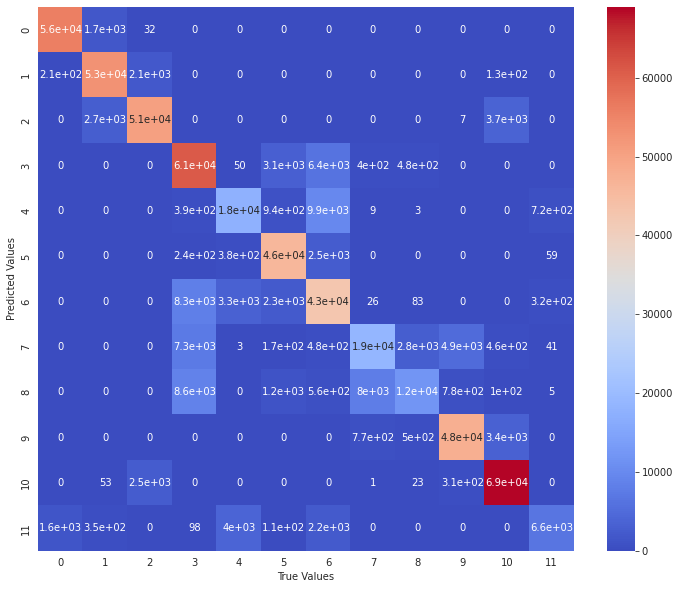

In [ ]:
evaluate(model)

1)From this heatmap plot it can be seen that model is really performing well for class 10, 9, 3, 2, 1, 0. But for other classes it is trying to perform better but becuase of data imbalances it is lagging behind.

2)From the classification report it can be seen that the model has a weighted average of 0.83 for precision and 0.82 for the recall which is actually good.

###2)Random Forest classifier

Random forest classifier is a supervised machine learning algorithm which is more advanced, and since the output desired from this dataset is a classification problem, using a random forest classifier will be a good practice. this model is made from a multitude of decision trees which are the building blocks of the random forest classifier, basically it uses an ensemble method , which means it collects the output class from each tree and the class with the most votes is therefore the model's prediction.

In [ ]:
#note: this cell might take up to 45 minutes to run 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

Model's Training Accuracy is 1.0
Model's Testing  Accuracy is 0.9999639708884779
Model's classification report               precision    recall  f1-score   support

           1       1.00      1.00      1.00     57639
           2       1.00      1.00      1.00     55516
           3       1.00      1.00      1.00     56918
           4       1.00      1.00      1.00     71319
           5       1.00      1.00      1.00     29628
           6       1.00      1.00      1.00     49339
           7       1.00      1.00      1.00     56870
          12       1.00      1.00      1.00     34879
          13       1.00      1.00      1.00     31466
          16       1.00      1.00      1.00     52532
          17       1.00      1.00      1.00     71850
          24       1.00      1.00      1.00     14906

    accuracy                           1.00    582862
   macro avg       1.00      1.00      1.00    582862
weighted avg       1.00      1.00      1.00    582862



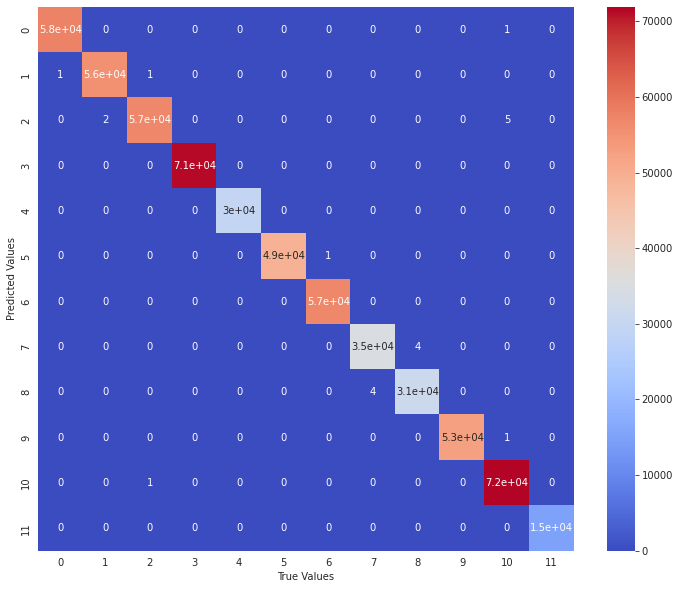

In [ ]:
#evalutating the model performance
evaluate(model)

From the above evaluation of the random forest classifier it can be noticed that the model is performing very good on this data set with 100% accuracy rate on the training set and 99.9% on the test set with precision and recall of 1 ,the model parameters were kept to default wiht number of trees of 100 in the forest which is going to take a long time to run on the dataset but will give out good results as shown, as mentioned before the hierarchial classificatoin model which is more complex and the output of the model is based on the votes from the 100 trees in its underlying structure yielding good evaluation metrics.

### 3) K Means Clustering

Third model that was selected  is KMean Clustering model, this model is an unsupervised machine learning model. K-means is a centroid-based algorithm, or a distance-based algorithm, where it calculates the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. the closed the distance between the clusters the better the result is.

Here a Partitional clustering model name K Means clusters was built. But before building the model the ELBOW method was used to get the optimal number of clusters. For that an iteration throughout a list of number from 1 to 7 was carried out and for each number the model was trained, and therefore, getting its Sum of Squared Distances (SSD). SSD should be minimum as much as it can as mentioned before that will give better results. after that all SSD scores were stored in an array for each number of cluster and then the result was plot using matplot lib.
ELBOW method says that select the number of clusters at which the SSD graph is making an elbow shape. So, in the case that is being invistigated the elbow was at the point 2. So,  K=2 was selected  as best value for the number of clusters to be applied on the data.So the final model was made with 2 clusters.

The sihloutte score was intended to be also calculated but the running time was to big for an output to be produced.

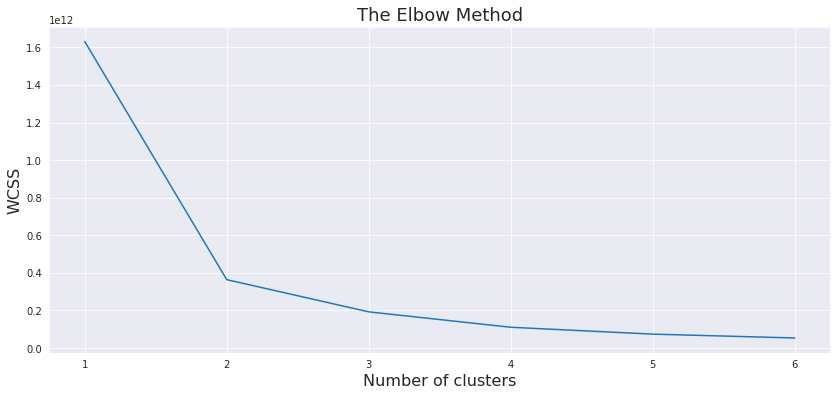

In [ ]:
#note:this cell might take up to 5 minutes to run
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score 

ss=[]
ars=[]
wcss=[]
number_clusters = range(1,7)

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(X_train)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
#     calculate silhouette and adjusted rand each time
#     ss.append(silhouette_score(X_train, kmeans.predict(X_train))) 

# print("90% confidence interval for silhouette score: [{},{}]".format(np.percentile(ss,5),np.percentile(ss,95)))
plt.figure(figsize=(14, 6))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method', fontsize=18)
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('WCSS', fontsize=16)
plt.show()

In [ ]:
#Training the model 
model = KMeans(2)
model.fit(X_train)

KMeans(n_clusters=2)

In [ ]:
# Model Performance
model.inertia_

363872800720.7732

for the k-means algorithm there are two ways to evalute how the algorithm is doing, first one is sihloutte score and the second one is inertia. Inertia is a measure of how well the dataset was clustered by k-means, it basically measure the distance of each point from its centroid,squaring the distance and summing these square across each cluster. Now a good model is a model with low inertia and low number of clusters, but of course this is a tradeoff because as K increases inertia decreases, so this is where the elbow method comes in and gives out the best number of clusters to use on the data, in this case the best performance for the model was using K=2 with the model having an inertia value of 363872779899.0561 as shown above.

#Conclusion

In conclusion after doing data preprocessing, EDA, hypothesis testing and modelling using 3 different classification models. It was concluded that from the data provided, and from this report , a software could be made to predict the type of activity that a person was doing depending on many factors which are mentioned in features of the dataset. using random forest classifier here would be the best case depending on the evaluation of the models , but also K-Means and logistic regression give good results. 

health and fitness is a very important topic nowadays and developing software to help people know which activities help them achieve their fitness goals would be a profitable thing. And having such a valuable data could help in the process of doing so.

it should be noticed that the data collected was only from 9 people, so if data from more people from different backgrounds in the society and different ethnicities could be gathered, a wider study could be conducted to give even more accurate predictions.

#Resources

In [ ]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 437

import io
from nbformat import current

filepath="/content/drive/MyDrive/Colab Notebooks"
filepath="/content/drive/MyDrive/Colab Notebooks/PAMAP_DSRM_Final.ipynb"
question_count=437

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 3693


1.   https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148 (logistic regression)
2.  https://www.yourdatateacher.com/2021/05/19/hyperparameter-tuning-grid-search-and-random-search/ (hyperparameter tuning)
3.https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html (logistic regression)
4.https://asperbrothers.com/blog/logistic-regression-in-python/(evaluating logistic regression model) (evaluating logistic regression)
5.https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
6.https://blog.cambridgespark.com/
how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f (K-means)
7.https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a (K-means)
8.https://towardsdatascience.com/understanding-random-forest-58381e0602d2 (random forest)
9.https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html (Random forest)
10.lecture slides and labs , note the random forest classifier was taken into consideration from the NHS lecture slides
11.function to calculate submission length from NLP lab

## **Submition length:3933 according to Microsoft word count**